# ECE 4200 Assignment 5 

## Coding (Support Vector Machines): Digit classification using SVM 

We consider hand written digit recognition, MNIST. Please visit http://yann.lecun.com/exdb/mnist/ for more information about the original MNIST dataset.

In this competition, you will be given images of hand written digits. Each image is grayscale, and 28 by 28 pixels. Your goal is to design a classifier for this problem (output digits from 0 to 9).

Make sure you have installed the package scikit-image:

``
    pip3 install scikit-image
``

or 


``
    conda install scikit-image
``

You can use the following script to load data.

In [1]:
%matplotlib inline
from scipy.io import loadmat
import numpy as np
data_path = "./mnist.mat"
data_raw = loadmat(data_path)
images = data_raw['data'].T
label = data_raw['label'][0]

Data will be an array of 70000 784-length numpy arrays. 50000 of them will be the training data and 20000 of them will be the testing data. The corresponding labels of training data are also provided. 

Each vector represents an image of size $28 \times 28$. The original black and white images were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The images were centered in a 28x28 image by computing the center of mass of the pixels, and translating the image so as to position this point at the center of the 28x28 field. 

You can reshape each vector to be an $28 \times 28$ matrix and plot the image using the following script. Typical images will look like the following:

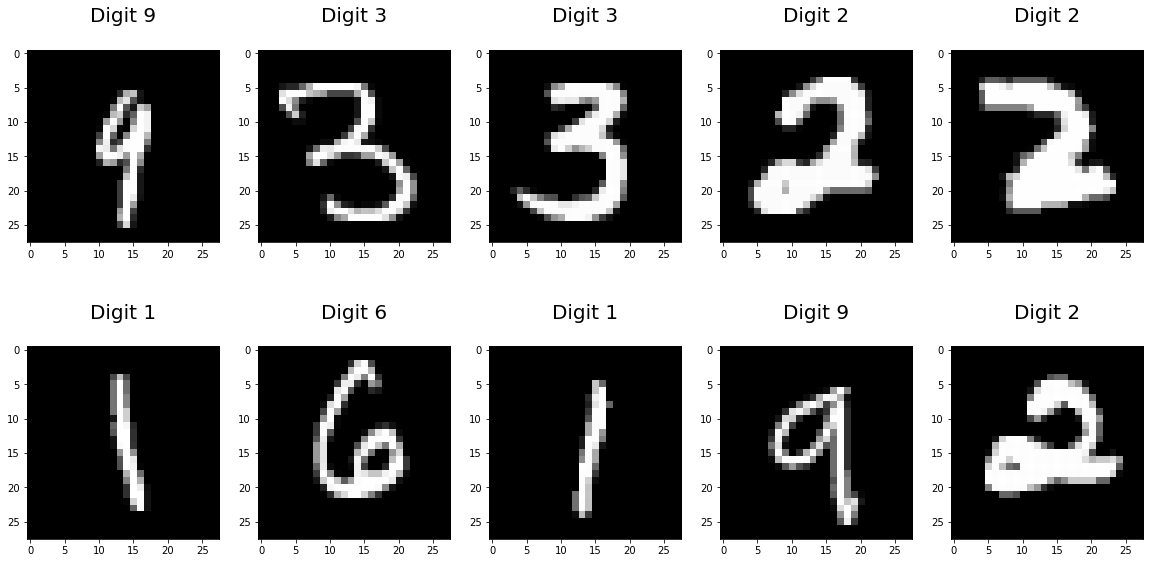

In [2]:
import matplotlib.pyplot as plt
import random
plt.figure(figsize=(20,10))
for i in range(10,20):
    plt.subplot(2, 5, i-9)
    t = random.randint(0,70000)
    plt.imshow(np.reshape(images[t,:], (28,28)), cmap = plt.cm.gray)
    plt.title('Digit %i\n' %label[t], fontsize = 20)

### Sampling, Normalization and Data splitting

To make training faster, we only take 10% of the data randomly. Then we further reduce the dimension of the data by taking the average of each  Then we split the data into training and testing set and normalize them by max norm.

In [3]:
from sklearn.model_selection import train_test_split
X_new, X_unused, Y_new, Y_unused = train_test_split(images, label, test_size = 0.9, random_state = 1000)
X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_new, Y_new, test_size = 0.3, random_state = 1000) # split the dataset into training and testing sets
X_trn = X_trn/256
X_tst = X_tst/256

### Image Rescaling
To make the training even faster. The next code block rescale all the images by reducing the height and width of the image both by half. We make each $2\times 2$ block in the orginal image into a single pixel in the new image. The resulting value of the pixels in the new image will be the average of the original four pixels.

Then we get new images with $14 \times 14$ in size and stores in the rows of X_trn_new and X_tst_new.

In [4]:
from skimage.transform import rescale, resize, downscale_local_mean
m, n = X_trn.shape
n_new = n//4
X_trn_new = np.zeros((m,n_new))
for i in range(m):
    image = np.reshape(X_trn[i,:], (28,28))
    image_rescaled = rescale(image, 1.0 / 2.0, anti_aliasing=False)
    X_trn_new[i,:] = np.reshape(image_rescaled, n_new)

m2 = X_tst.shape[0]
X_tst_new = np.zeros((m2,n_new))
for i in range(m2):
    image = np.reshape(X_tst[i,:], (28,28))
    image_rescaled = rescale(image, 1.0 / 2.0, anti_aliasing=False)
    X_tst_new[i,:] = np.reshape(image_rescaled, n_new)
    
print('The new training set has size: '+ str(X_trn_new.shape))
print('The new testing set has size: '+ str(X_tst_new.shape))

The new training set has size: (4900, 196)
The new testing set has size: (2100, 196)


## 1. Linear SVM
Run a linear SVM for the penalty parameter $$C \in \{2^i: i = 0, 1, ..., 19\}$$, and plot the training and testing accuracy as a function of $log C$ (semi-log plot).

Explain how the accuracy changes with repect to penalty parameter $C$ (describe the underfitting and overfitting phenomenon). 

What is the maximum testing accruracy achieved among all penalty parameters for linear SVM?

### Response:
If the penalty parameter is small, the decision boundary is also small, but the accuracy does not perform well, this is the underfitting situation. If the penalty parameter becomes larger, the training set accuracy becomes also higher, but this may led to overfitting, which cause the testing set accuracy become smaller.

The maximum testing accuracy is 0.9214 at the begining, after that, due to overfitting phenomenon, it cannot reach to another higher accuracy.

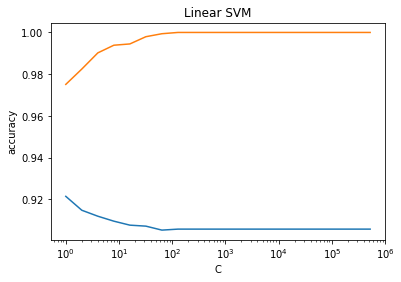

The maximum testing accuracy achieved with Linear SVM is: 0.9214285714285714


In [5]:
from sklearn.svm import SVC
n = np.array(range(20))
C = 2**n
accuracy_tst = []
accuracy_trn = []
#========Your Code Here============
for i in C:
    clf_trn = SVC(C=i, kernel='linear')
    clf_trn.fit(X_trn_new, Y_trn)
    accuracy_trn.append(clf_trn.score(X_trn_new, Y_trn))
    accuracy_tst.append(clf_trn.score(X_tst_new, Y_tst))
max_acc = np.max(accuracy_tst)
#=============================
plt.semilogx(C, accuracy_tst)
plt.semilogx(C, accuracy_trn)
plt.title("Linear SVM")
plt.xlabel('C')
plt.ylabel('accuracy')
plt.show()
print('The maximum testing accuracy achieved with Linear SVM is: ' + str(max_acc))

## 2. Polynomial SVM
Run an SVM with polynomial kernel of degree $2, 3, 4$ with the penalty parameter $$C \in \{2^i: i = 0, 1, ..., 19\}$$ and plot the training and testing accuracy as a function of $log C$ (semi-log plot).

Explain how the accuracy changes with repect to penalty parameter $C$ (describe the underfitting and overfitting phenomenon). 

What is the maximum testing accuracy achieved among all penalty parameters for an SVM with a polynomial kernel of each degree? Compare it with linear SVM and explain.

### Response:
For the training set, if the penalty parameter is small,the accuracy will not that accurate due to underfitting. If the penalty parameter gets larger, the accuracy becomes also higher, eventually, overfitting occurs.

The maximum testing accuracy gradually goes down as the degree of the polynomial SVM grows, this is because the overfitting problem and the growth of the penalty parameter. So when degree is 1, the maximun accuarcy is 0.9514, which is exactly the same as the linear SVM. When the degree is 2, the maximun accuarcy is 0.9457, and when degree is 3, the maximun accuarcy is 0.9352. You can see that the accuracy continues to get smaller.

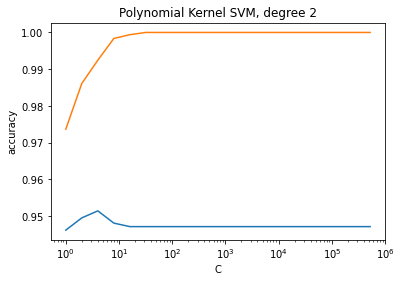

The maximum testing accuracy achieved with Polynomial Kernel SVM of degree 2 is: 0.9514285714285714


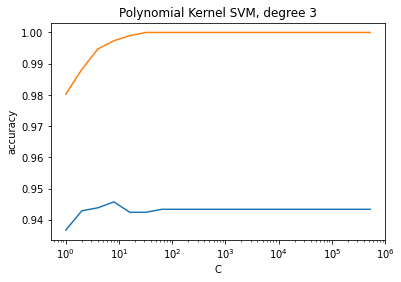

The maximum testing accuracy achieved with Polynomial Kernel SVM of degree 3 is: 0.9457142857142857


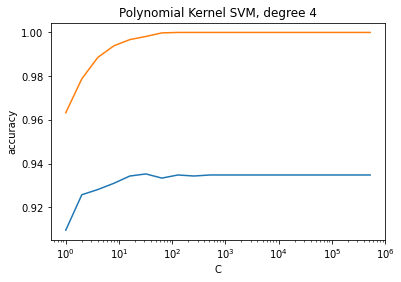

The maximum testing accuracy achieved with Polynomial Kernel SVM of degree 4 is: 0.9352380952380952


In [6]:
from sklearn.svm import SVC
D = [2, 3, 4]
n = np.array(range(20))
C = 2**n
max_acc = np.zeros(3)
for i in range(3):
    accuracy_tst = []
    accuracy_trn = []
    d = D[i]
    #========Your Code Here============
    for j in C:
        clf_trn = SVC(C=j, kernel='poly', degree=d)
        clf_trn.fit(X_trn_new, Y_trn)
        accuracy_trn.append(clf_trn.score(X_trn_new, Y_trn))
        accuracy_tst.append(clf_trn.score(X_tst_new, Y_tst))
    max_acc[i] = np.max(accuracy_tst)
    #=============================
    plt.semilogx(C, accuracy_tst)
    plt.semilogx(C, accuracy_trn)
    plt.title("Polynomial Kernel SVM, degree %i" %d)
    plt.xlabel('C')
    plt.ylabel('accuracy')
    plt.show()
    print('The maximum testing accuracy achieved with Polynomial Kernel SVM of degree ' + str(d) + ' is: ' + str(max_acc[i]))

## 3. SVM with Gaussian Kernel.
Run an SVM with Gaussian kernel with the penalty parameter $$C \in \{2^i: i = 0, 1, ..., 19\}$$ and plot the training and testing accuracy as a function of $log C$ (semi-log plot).

Explain how the accuracy changes with respect to penalty parameter $C$ (describe the underfitting and overfitting phenomenon). 

What is the maximum testing accuracy achieved among all penalty parameters for SVM with Gaussian kernel of each degree? Compare it with linear SVM and polynomial SVM and explain.

### Response:
Like the phenomenon mentioned above, in the training set, when the penalty parameter is small, the accuracy will face underfitting. And if the penalty parameter gets larger, the accuracy becomes also higher, at some point it will face overfitting.

The maximum testing accuracy of the SVM with Gaussian kernel is 0.956 because once the penalty parameter grows too big, it becomes overfitting. Among these three SVMs, SVC rbf has the best performance. The accuracy increases the fastest as the penalty parameter gradually grows.

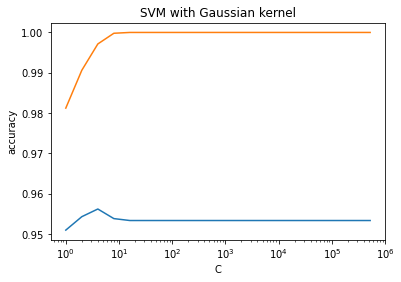

The maximum testing accuracy achieved with SVM with Gaussian kernel is: 0.9561904761904761


In [7]:
from sklearn.svm import SVC
accuracy_tst = []
accuracy_trn = []
n = np.array(range(20))
C = 2**n
#========Your Code Here============
for i in C:
    clf_trn = SVC(C=i, kernel='rbf')
    clf_trn.fit(X_trn_new, Y_trn)
    accuracy_trn.append(clf_trn.score(X_trn_new, Y_trn))
    accuracy_tst.append(clf_trn.score(X_tst_new, Y_tst))
    max_acc = np.max(accuracy_tst)
#=============================
plt.semilogx(C, accuracy_tst)
plt.semilogx(C, accuracy_trn)
plt.title("SVM with Gaussian kernel")
plt.xlabel('C')
plt.ylabel('accuracy')
plt.show()
print('The maximum testing accuracy achieved with SVM with Gaussian kernel is: ' + str(max_acc))